In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPool2D,Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.math as tf

In [2]:
data=pd.read_csv('./train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
digits=data.drop(['label'],axis=1).values
labels=data.label

In [5]:
digits

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

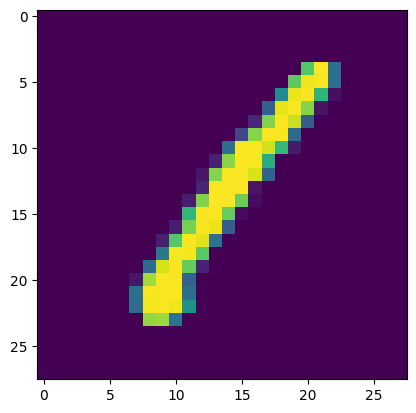

In [12]:
plt.imshow(digits[0].reshape(28,28))

In [76]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(digits,labels,test_size=0.2,random_state=42)

In [77]:
Xtrain=Xtrain/255.0
Xtest=Xtest/255.0
Xtrain=Xtrain.reshape(len(Xtrain),28,28,1)
Xtest=Xtest.reshape(len(Xtest),28,28,1)

In [18]:
Xtrain[0].shape

(28, 28, 1)

In [78]:
Ytrain=to_categorical(Ytrain)

In [27]:
model=Sequential(
    [
        Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)),
        Dropout(0.2),
        Conv2D(64,kernel_size=5,activation='relu'),
        Dropout(0.2),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ]
)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

C:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,982,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,034,762 (7.76 MB)

 Trainable params: 2,034,762 (7.76 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model_history=model.fit(Xtrain,Ytrain,validation_split=0.33,epochs=10,batch_size=64)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9988 - loss: 0.0047 - val_accuracy: 0.9990 - val_loss: 0.0026
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.9984 - loss: 0.0046 - val_accuracy: 0.9982 - val_loss: 0.0054
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 65ms/step - accuracy: 0.9978 - loss: 0.0053 - val_accuracy: 0.9987 - val_loss: 0.0046
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 99ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9977 - val_loss: 0.0077
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 68s 193ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 0.9955 - val_loss: 0.0153
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 48s 136ms/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9982 - val_loss: 0.0046
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.9992 - loss: 0.0022 - val_accuracy: 0.9973 - val_loss: 0.0088
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.9990 - loss: 0.0033 

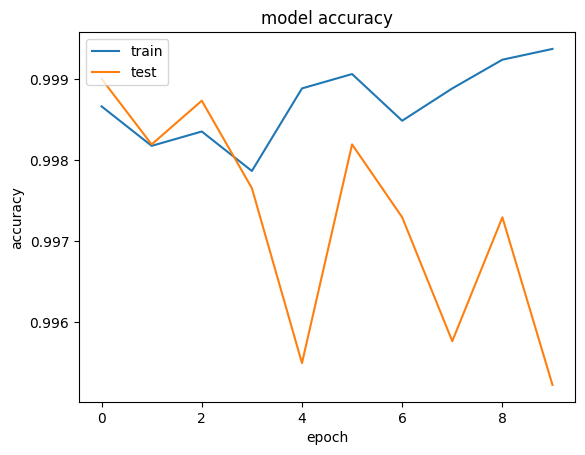

In [61]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

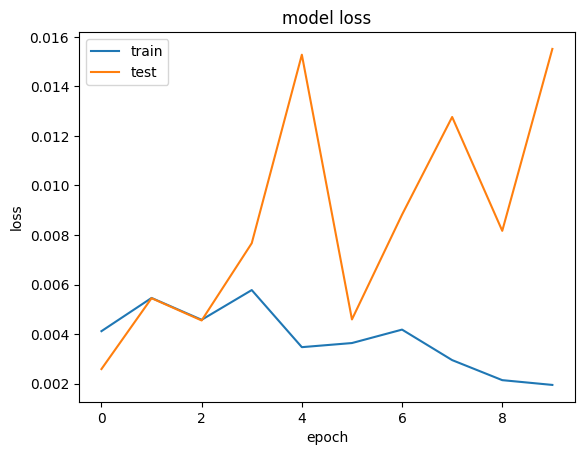

In [62]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
_,accuracy=model.evaluate(Xtest,to_categorical(Ytest))

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9833 - loss: 0.1069


In [80]:
accuracy*100

98.57142567634583

In [68]:
pred=model.predict(Xtest)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


In [69]:
predictedLabels=[]
for i in pred:
    predictedLabels.append(np.argmax(i))

Text(120.72222222222221, 0.5, 'Truth')

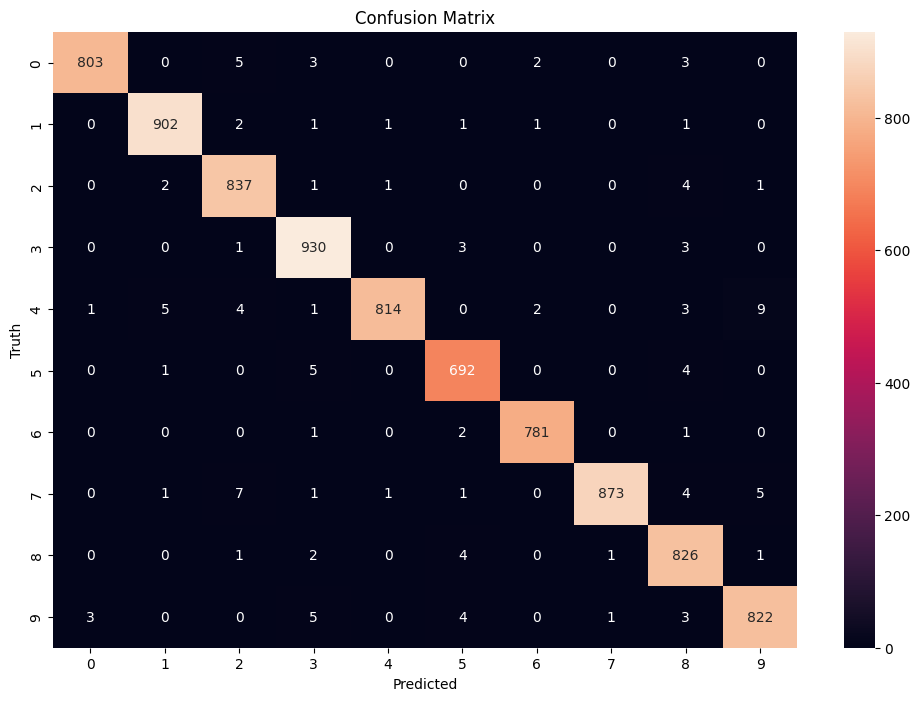

In [82]:
plt.figure(figsize=(12,8))
sns.heatmap(tf.confusion_matrix(labels=Ytest,predictions=predictedLabels),annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')